In [39]:
# รายการประเภทที่ต้องนับ
categories = [
    'Nigeria', 'Norway', 'Pakistan', 'Australia'
]
lang = [
    'english', 'thai', 'russian', 'german'
]

count data

In [63]:
import pandas as pd
import glob
import os
from collections import defaultdict
from pprint import pprint


# กำหนดโฟลเดอร์ที่เก็บไฟล์ CSV
folder_path = "./data"  # เปลี่ยนตามตำแหน่งจริง
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))



# เก็บผลลัพธ์นับแยกตามภาษาและประเภท
summary = defaultdict(lambda: defaultdict(int))

for file in csv_files:
    # อ่านไฟล์
    df = pd.read_csv(file)
    df.columns = df.columns.str.replace('\ufeff', '').str.strip('"')

    # ตรวจสอบว่าคอลัมน์ที่เราต้องการมีอยู่ไหม
    col_name = df.columns[0]  # สมมุติว่าคอลัมน์ A คือคอลัมน์แรก

    # ตรวจสอบภาษา (จากชื่อไฟล์ เช่น -en.csv หรือ -th.csv)
    if '-en' in file:
        lang = 'english'
    elif '-th' in file:
        lang = 'thai'
    elif '-ru' in file:
        lang = 'russian'
    elif '-de' in file:
        lang = 'german'
    else:
        print('ไม่มีไฟล์')  # ถ้าไม่ตรงกับภาษาใดๆ ให้ข้ามไฟล์นี้
    # นับแต่ละประเภท
    for cat in categories:
        count = df[col_name].str.strip().eq(cat).sum()
        summary[lang][cat] += int(count)

# แสดงผลลัพธ์
data = {}

for lang in summary:
    temp = {}
    for cat in categories:
        temp[cat] = summary[lang][cat]  # นับแต่ละ category
    data[lang] = temp  # ใส่ทั้งหมดในรอบเดียว
pprint(data)


{'english': {'Australia': 19, 'Nigeria': 17, 'Norway': 8, 'Pakistan': 13},
 'thai': {'Australia': 3, 'Nigeria': 2, 'Norway': 1, 'Pakistan': 0}}


data to csv or excel

In [42]:
import csv

# สร้างไฟล์ CSV
header = ['category'] + sorted(next(iter(data.values())).keys())

# เขียนไฟล์
with open('summary.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    create_indent = [writer.writerow([''] * len(header)) for _ in range(5)]
    writer.writerow(header)

    for category, countries in data.items():
        row = [category] + [countries[country] for country in sorted(countries.keys())]
        writer.writerow(row)

plot graph

  Category    Country  Value
0     thai    Nigeria      2
1     thai     Norway      1
2     thai   Pakistan      0
3     thai  Australia      3
4  english    Nigeria     17
5  english     Norway      8
6  english   Pakistan     13
7  english  Australia     19
[{'Category': 'thai', 'Country': 'Nigeria', 'Value': 2},
 {'Category': 'thai', 'Country': 'Norway', 'Value': 1},
 {'Category': 'thai', 'Country': 'Pakistan', 'Value': 0},
 {'Category': 'thai', 'Country': 'Australia', 'Value': 3},
 {'Category': 'english', 'Country': 'Nigeria', 'Value': 17},
 {'Category': 'english', 'Country': 'Norway', 'Value': 8},
 {'Category': 'english', 'Country': 'Pakistan', 'Value': 13},
 {'Category': 'english', 'Country': 'Australia', 'Value': 19}]


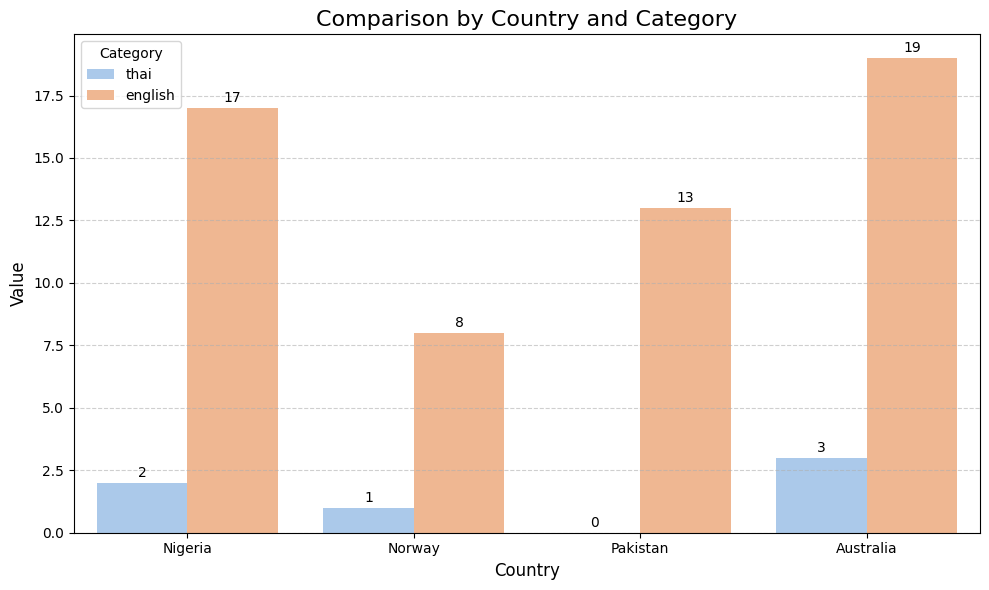

In [68]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

rows = []
for category, countries in data.items():
    for country, value in countries.items():
        rows.append({'Category': category, 'Country': country, 'Value': value})

df = pd.DataFrame(rows)
print(df)
pprint(rows)
# ใช้ seaborn สำหรับกราฟแท่งกลุ่ม
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Country', y='Value', hue='Category', palette='pastel')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=2)

# แต่งกราฟ
plt.title('Comparison by Country and Category', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Category')
plt.tight_layout()
plt.show()
